In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
df=pd.read_csv('subtaskB_dev.csv')
df.head()

,text,model,source,label
0,Title: End-to-End Learnable Histogram Filters\...,chatGPT,peerread,1
1,"The paper ""End-to-End Learnable Histogram Filt...",chatGPT,peerread,1
2,Summary: \r\n\r\nThis paper introduces the con...,chatGPT,peerread,1
3,This paper addresses the problem of finding a ...,chatGPT,peerread,1
4,Title: Rotation Plane Doubly Orthogonal Recurr...,chatGPT,peerread,1


In [3]:
df

,text,model,source,label
0,Title: End-to-End Learnable Histogram Filters\...,chatGPT,peerread,1
1,"The paper ""End-to-End Learnable Histogram Filt...",chatGPT,peerread,1
2,Summary: \r\n\r\nThis paper introduces the con...,chatGPT,peerread,1
3,This paper addresses the problem of finding a ...,chatGPT,peerread,1
4,Title: Rotation Plane Doubly Orthogonal Recurr...,chatGPT,peerread,1
...,...,...,...,...
14560,The paper Energy-Based Spherical Sparse Coding...,dolly,peerread,5
14561,"Dear Author, I have reviewed your submitted pa...",dolly,peerread,5
14562,Denoising Auto-Encoders (DAE) have been used i...,dolly,peerread,5
14563,"The paper Revisiting Denoising Auto-Encoders, ...",dolly,peerread,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14565 entries, 0 to 14564
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14565 non-null  object
 1   model   14565 non-null  object
 2   source  14565 non-null  object
 3   label   14565 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 455.3+ KB


In [5]:
df.isnull().sum()

text      0
model     0
source    0
label     0
dtype: int64

In [6]:
df['model'].value_counts()

model
human      2857
chatGPT    2344
davinci    2344
dolly      2344
cohere     2342
bloomz     2334
Name: count, dtype: int64

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='model', ylabel='count'>

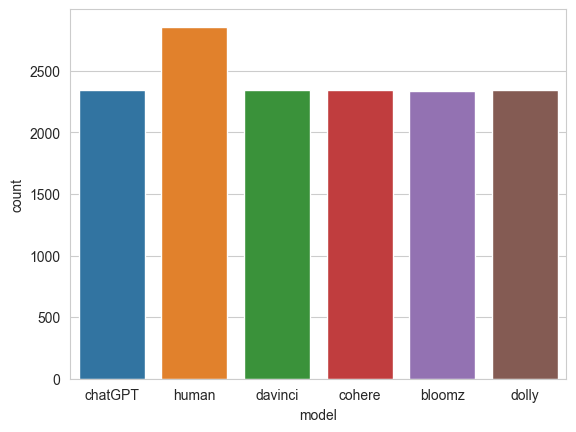

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='model',hue='model',data=df)

In [9]:
df.head()

,text,model,source,label
0,Title: End-to-End Learnable Histogram Filters\...,chatGPT,peerread,1
1,"The paper ""End-to-End Learnable Histogram Filt...",chatGPT,peerread,1
2,Summary: \r\n\r\nThis paper introduces the con...,chatGPT,peerread,1
3,This paper addresses the problem of finding a ...,chatGPT,peerread,1
4,Title: Rotation Plane Doubly Orthogonal Recurr...,chatGPT,peerread,1


In [10]:
df=df.iloc[0:,0:2]

In [11]:
df

,text,model
0,Title: End-to-End Learnable Histogram Filters\...,chatGPT
1,"The paper ""End-to-End Learnable Histogram Filt...",chatGPT
2,Summary: \r\n\r\nThis paper introduces the con...,chatGPT
3,This paper addresses the problem of finding a ...,chatGPT
4,Title: Rotation Plane Doubly Orthogonal Recurr...,chatGPT
...,...,...
14560,The paper Energy-Based Spherical Sparse Coding...,dolly
14561,"Dear Author, I have reviewed your submitted pa...",dolly
14562,Denoising Auto-Encoders (DAE) have been used i...,dolly
14563,"The paper Revisiting Denoising Auto-Encoders, ...",dolly


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14565 entries, 0 to 14564
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14565 non-null  object
 1   model   14565 non-null  object
dtypes: object(2)
memory usage: 227.7+ KB


In [13]:
df=df.sample(frac=1)
df

,text,model
12122,The authors present an interesting approach to...,bloomz
4480,"Dear Authors,\r\n\r\nPlease resubmit your pape...",human
6450,\r\n\r\nThis paper addresses the problem of cr...,davinci
8317,\r\nThis paper addresses the problem of design...,cohere
8386,\r\nThis paper evaluates the impact of differe...,cohere
...,...,...
4944,The multiagent system is proposed as a general...,human
6629,\r\n\r\nThis paper presents an approach to aut...,davinci
3097,The paper describes an MT training data select...,human
8489,\r\nThis paper addresses the problem of semi-s...,cohere


In [14]:
from sklearn.model_selection import train_test_split
X=df['text']
y=df['model']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

In [17]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
#mnb = MultinomialNB()
#dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [18]:
from sklearn import metrics

In [19]:
def score_prediction(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test, pr)
    pre_score = metrics.precision_score(y_test, pr, average="weighted")
    recall = metrics.recall_score(y_test, pr, average="weighted")
    f1 = metrics.f1_score(y_test, pr, average="weighted")
    mcc = metrics.matthews_corrcoef(y_test, pr)
    return acc_score, pre_score, recall, f1, mcc


In [20]:
acc_score = {}
pre_score = {}
recall_score={}
f1_score={}
mcc_score={}
clfs= {
    'LR':lg,
    'SVM':sv,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,

}

In [21]:
for name,clf in clfs.items():
    acc_score[name],pre_score[name],recall_score[name],f1_score[name],mcc_score[name] = score_prediction(clf,X_train_tfidf,X_test_tfidf,y_train,y_test)

In [22]:
acc_score

{'LR': 0.9419842087195331,
 'SVM': 0.9546858908341915,
 'KNN': 0.3683487813250944,
 'RFC': 0.9255063508410574,
 'ETC': 0.9255063508410574,
 'ABC': 0.38757294884998283,
 'BG': 0.884998283556471,
 'GBC': 0.9248197734294542}

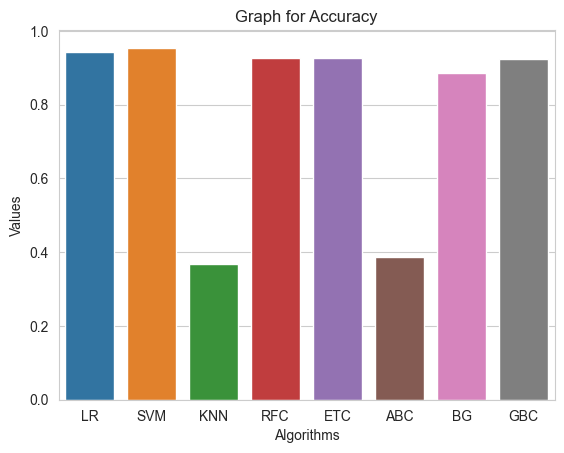

In [28]:
keys = list(acc_score.keys())
values = list(acc_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for Accuracy')

# Show the plot
plt.show()


In [29]:
pre_score

{'LR': 0.9429160617586188,
 'SVM': 0.9554275653755595,
 'KNN': 0.5164112291279018,
 'RFC': 0.9250886055937101,
 'ETC': 0.924718585276268,
 'ABC': 0.44459036887399556,
 'BG': 0.884170913735843,
 'GBC': 0.9252969224951002}

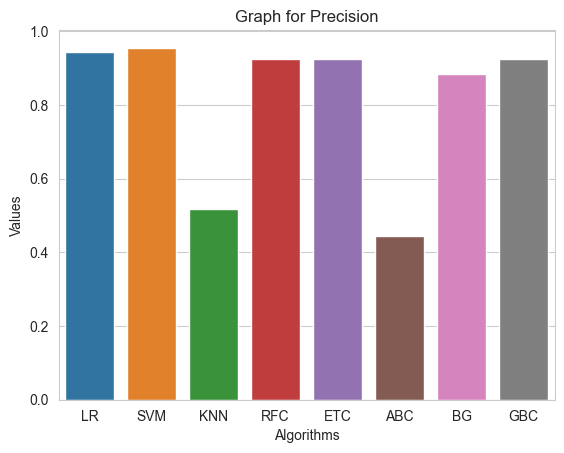

In [30]:
keys = list(pre_score.keys())
values = list(pre_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for Precision')

# Show the plot
plt.show()


In [31]:
recall_score

{'LR': 0.9419842087195331,
 'SVM': 0.9546858908341915,
 'KNN': 0.3683487813250944,
 'RFC': 0.9255063508410574,
 'ETC': 0.9255063508410574,
 'ABC': 0.38757294884998283,
 'BG': 0.884998283556471,
 'GBC': 0.9248197734294542}

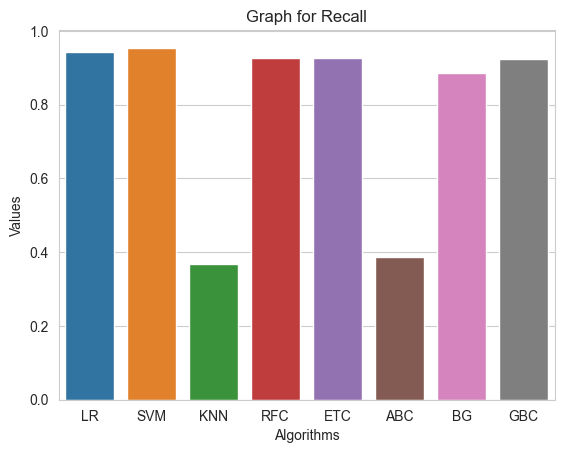

In [32]:
keys = list(recall_score.keys())
values = list(recall_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for Recall')

# Show the plot
plt.show()

In [33]:
f1_score

{'LR': 0.9421146345583409,
 'SVM': 0.9548270727871038,
 'KNN': 0.3901854181758774,
 'RFC': 0.9249137542001166,
 'ETC': 0.9249622492606201,
 'ABC': 0.340461756814495,
 'BG': 0.8844039057827435,
 'GBC': 0.9249232641287307}

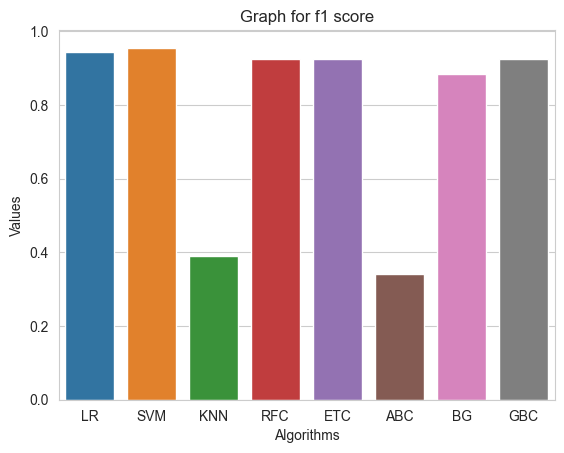

In [34]:
keys = list(f1_score.keys())
values = list(f1_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for f1 score')

# Show the plot
plt.show()

In [35]:
mcc_score

{'LR': 0.9303957317430739,
 'SVM': 0.9455961997677454,
 'KNN': 0.2586104984707206,
 'RFC': 0.9105255942130979,
 'ETC': 0.9104528515066727,
 'ABC': 0.3125384973716608,
 'BG': 0.8617461901150194,
 'GBC': 0.9096374177258126}

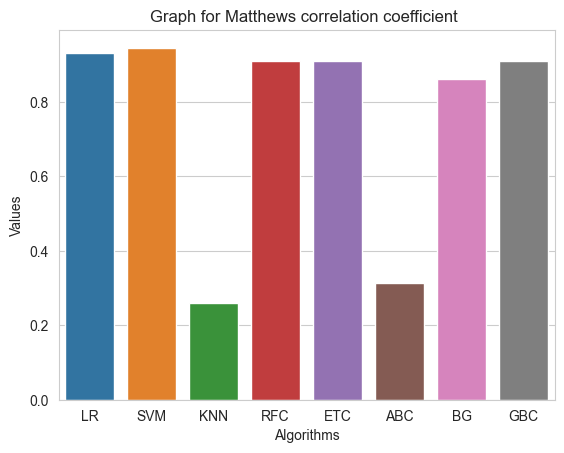

In [36]:
keys = list(mcc_score.keys())
values = list(mcc_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for Matthews correlation coefficient ')

# Show the plot
plt.show()

In [39]:
sv.fit(X_train_tfidf,y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [41]:
import pickle
with open('two_graph.pkl', 'wb') as f:
    pickle.dump(sv, f)

In [42]:
with open('two_graph.pkl', 'rb') as f:
    loaded_model = pickle.load(f)